In [46]:
%matplotlib inline

from multiprocessing import Pool
import matplotlib.pyplot as plt

import random
import csv as csv
import numpy as np
import graphviz as gv
from sklearn import tree, svm,preprocessing
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble 
from sklearn.manifold import MDS
from pandas.tools.plotting import scatter_matrix
import pandas
from scipy.stats.stats import pearsonr 

def load_and_append (arr, res_file):
    fo = open(res_file,"r")
    csv_fo =  csv.reader(fo)
    next(csv_fo)
    dr = []
    for line in csv_fo:
        dr.append(line)
    dr = np.array(dr)

    if arr ==[]:
        arr = dr
    else:
        arr = np.column_stack((arr,dr[:,3]))
    return arr



In [61]:
data = []
data = load_and_append (data,"../kaggle_data/processed.csv")


data = data [:,0:2]

data = load_and_append (data,"../output/prob_adaboost.csv")
data = load_and_append (data,"../output/prob_decisiontree.csv")
data = load_and_append (data,"../output/prob_random_forest.csv")
data = load_and_append (data,"../output/prob_svm.csv")
data = load_and_append (data,"../output/prob_xgboost.csv")
data = load_and_append (data,"../output/prob_logistic.csv")
data = load_and_append (data,"../output/prob_k_neighbors.csv")
header = ["id","surv","adaboost","decistree","rand_forest","svm","xgboost","logistic","k_neighbors"]


print (header)

feature_names = header[2:]
print (feature_names)
x_id = np.copy(data[:,0])
has_surv = (data[:,1]!="")
y = np.copy(data[has_surv,1]).astype(int)
X = np.copy(data[has_surv,2:]).astype(float)

['id', 'surv', 'adaboost', 'decistree', 'rand_forest', 'svm', 'xgboost', 'logistic', 'k_neighbors']
['adaboost', 'decistree', 'rand_forest', 'svm', 'xgboost', 'logistic', 'k_neighbors']


(891, 7)


C:\Python34\python-3.4.3.amd64\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


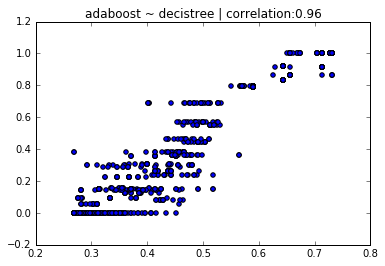

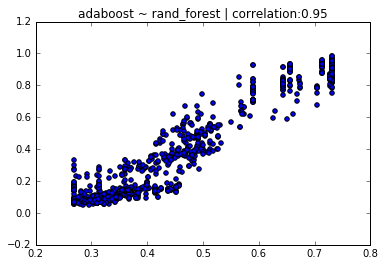

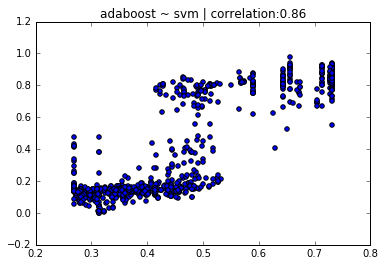

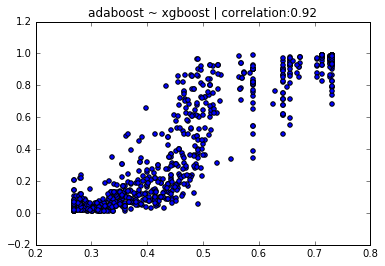

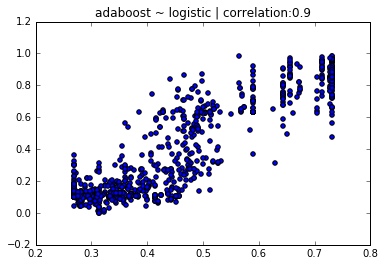

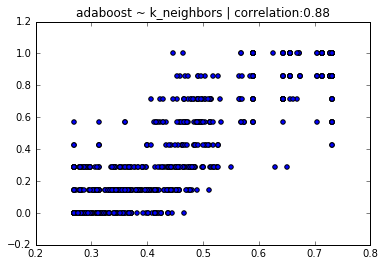

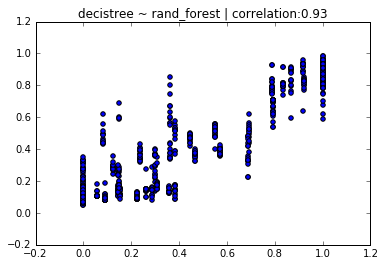

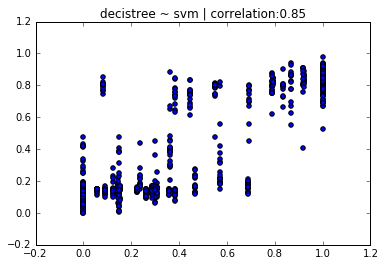

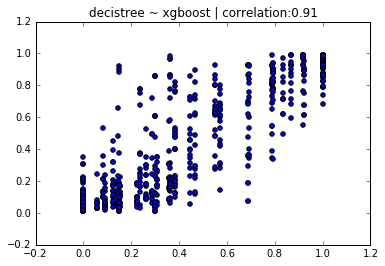

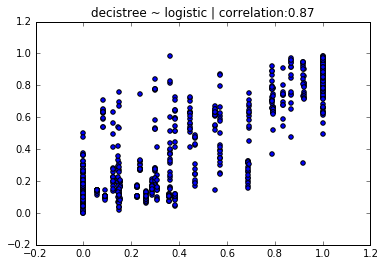

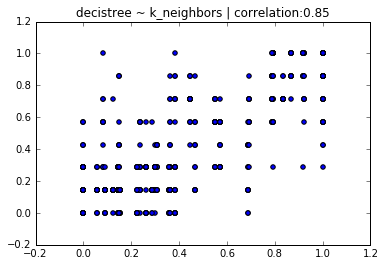

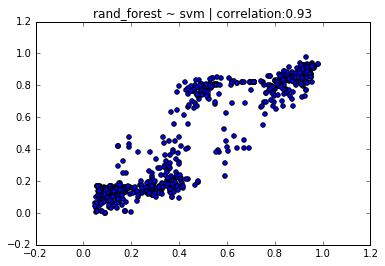

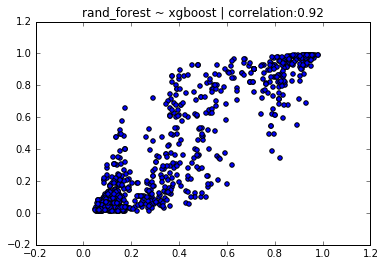

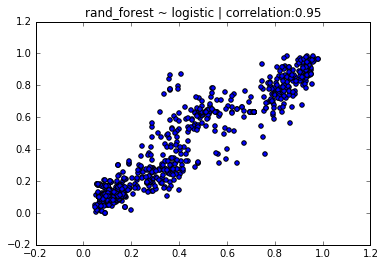

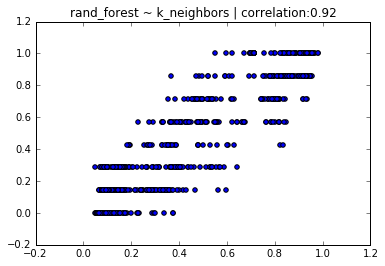

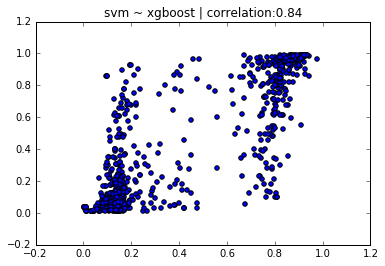

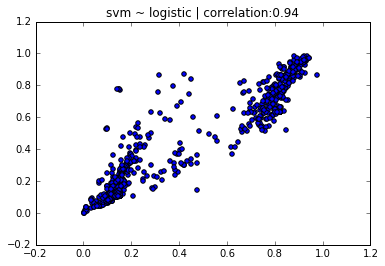

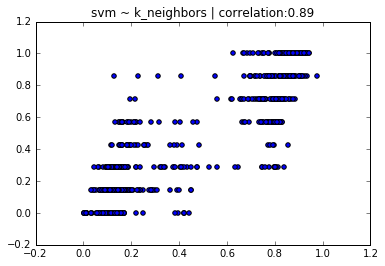

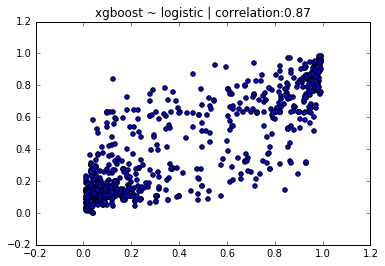

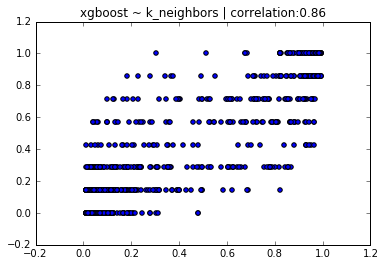

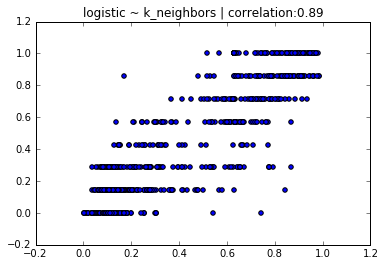

In [63]:
#X = pandas.DataFrame (X)
#scatter_matrix(X, alpha=0.2, figsize=(6, 6), diagonal='kde')

i_range = np.arange (0,6,1)
print (X.shape)
#plt.figure(1)
k = 0
for i in range(X.shape[1]):
    for j in range (i+1,X.shape[1]):
        k = k+1
        plt.figure(k)
        x1 = X[:,i]
        x2 = X[:,j]
        x_corr = round(pearsonr(x1,x2)[0],2)
        plt.scatter(x1,x2)
        plt.title (feature_names[i] + " ~ " + feature_names[j] + " | correlation:" + str(x_corr))
plt.show()